# εφαρμογή τεχνητών νευρωνικών δικτύων
## 1.Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error

/Users/nothing/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## 2.ipothetiko tyxaio data-set

ορισμός μεταβλητών επιρροής του κόστους και πλήθος παρατηρήσεων (100)

In [3]:
# Hypothetical dataset
data = {
    'road_length_km': np.random.uniform(1, 20, 100),
    'material_costs': np.random.uniform(1000, 10000, 100),
    'labor_hours': np.random.uniform(100, 1000, 100),
    'weather_days_rain': np.random.randint(0, 20, 100),
    'total_cost': np.random.uniform(10000, 200000, 100)  # Target variable
}
df = pd.DataFrame(data)
df.head()

,road_length_km,material_costs,labor_hours,weather_days_rain,total_cost
0,13.608841,5532.670941,972.581837,16,13986.119539
1,8.919088,1692.861082,650.285937,1,194423.838972
2,4.684175,5841.143876,849.775086,12,15965.048644
3,7.055347,3478.561962,466.628270,15,63217.540304
4,12.414780,6485.607742,486.056936,10,194152.405733


## 3.proepeksergasia dedomenwn

χωρισμός δεδομένων σε δεδομένα εκπαίδευσης και επιβεβαίωσης

In [4]:
X = df.drop('total_cost', axis=1)
y = df['total_cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print("X_train: ",y_train)

## kanonikopoiisi paragontwn

κανονικοποίση παραγόντων επιρροής με z-score normalization (x_kan = (x-μ)/σ)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# X_train_scaled = np.array(X_train_scaled)
# X_test_scaled = np.array(X_test_scaled)
# y_train = np.array(y_train)
# y_test = np.array(y_test)

# print("X_scaled: ",X_train_scaled.shape(), )

print(type(X_train_scaled), type(y_train))
print(X_train_scaled.shape, y_train.shape)

print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)

print("NaNs in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("NaNs in y_train:", np.isnan(y_train).sum())
print("NaNs in X_test_scaled:", np.isnan(X_test_scaled).sum())
print("NaNs in y_test:", np.isnan(y_test).sum())



<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(80, 4) (80,)
X_train_scaled shape: (80, 4)
y_train shape: (80,)
NaNs in X_train_scaled: 0
NaNs in y_train: 0
NaNs in X_test_scaled: 0
NaNs in y_test: 0


## 4. dimiourgia montelou ANN

Ορισμός μοντελου (sequential) και αρχικοποίηση με input layer στο οποίο οι νευρώνες είναι ίσοι με τους παραγοντες επιρροής, 2 hidden layers τα οποία περιέχουν το καθένα 32 νευρώνες και output layer με μοναδικό νευρώνα. Χρησιμοποιήσαμε relu (rectified linear unit) ως συναρτηση ενργοποιησης για να επιτρέψουμε στο μοντέλο να εκπαιδευτεί σε σύνθετες μη-γραμμικές σχέσεις μεταξύ των παραγόντων επιρροής (Χ) και γραμμικη συναρτηση ενεργοποίησης στο output για να εξασφαλίσουμε ότι το κόστος θα είναι συνεχής τιμή.
Έπειτα κανουμε compile to μοντέλο με χρήση Adam Optimizer για δυναμική προσαρμογή του ρυθμού εκπαίδευσης (α). Επίσης ως συναρτηση κόστους θα ορίσουμε το μεσο τετραγωνικό σφάλμα και ως δείκτη απόδοσης θα χρησιμοποιήσουμε το μέσο απόλυτο σφάλμα (mae = Sum(yi-xi)/n)

In [12]:
# Initialize the model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))

# Second hidden layer
model.add(Dense(units=32, activation='relu'))

# Output layer (for regression)
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mae'])

/Users/nothing/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 5.Ekpaidefsi montelou
σε κάθε iteration το μοντέλο επεξεργάζεται 10 παραδείγματα απο το data set. Δεδομένου ότι υπάρχουν 100 παραδείγματα κάθε epoch tha έχει 10 iterations.


In [13]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=10)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14248266752.0000 - mae: 104824.5234 - val_loss: 11699815424.0000 - val_mae: 92596.1406
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14556535808.0000 - mae: 106136.6172 - val_loss: 11698569216.0000 - val_mae: 92589.2109
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13938318336.0000 - mae: 102478.8203 - val_loss: 11695961088.0000 - val_mae: 92574.7031
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13492264960.0000 - mae: 101634.2969 - val_loss: 11691063296.0000 - val_mae: 92547.5469
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15016075264.0000 - mae: 108982.0000 - val_loss: 11682658304.0000 - val_mae: 92500.8594
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13889246208.0000 - mae: 102835.7109 - val_loss: 11668979712.0000 - val_mae: 92425.0156
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12573779968.0000 - mae: 96510.1406 - val_loss: 11648145408.0000 - val_mae: 9230

## 6.grafimata

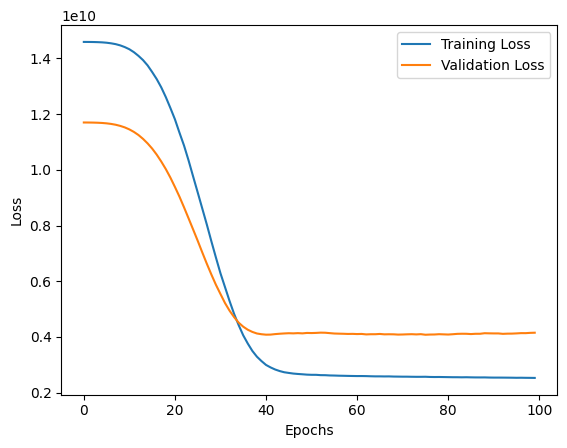

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## aksiologisi montelou

In [15]:
# Evaluate on test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mape = mean_absolute_percentage_error(y_test, y_pred)
# rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse = root_mean_squared_error(y_test,y_pred)

print(f'MAPE: {mape * 100:.2f}%')
print(f'RMSE: {rmse:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
MAPE: 114.13%
RMSE: 64429.56
